<a href="https://colab.research.google.com/github/Izyakowich/TMO/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Для анализа и визуализации данных выбран датасет "Wine Quality Dataset".

Датасет состоит из одного файла WineQT.txt

Файл содержит следующие колонки:
Об этом файле

Этот кадр данных содержит следующие столбцы:

Входные переменные (на основе физико-химических тестов):\
1 - фиксированная кислотность\
2 - летучие кислотность\
3 - лимонная кислота\
4 - остаточный сахар\
5 - хлориды\
6 - свободный диоксид серы\
7 - общий диоксид серы\
8 - плотность\
9 - pH\
10 - сульфаты\
11 - алкоголь\

Выходная переменная (на основе сенсорных данных):\
12 - качество (оценка от 0 до 10)




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

Загрузка данных

In [ ]:
data = pd.read_csv('/content/WineQT.csv', sep=",")

Основные характеристики датасета

In [ ]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [ ]:
data.shape

(1143, 13)

In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [ ]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [ ]:
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

fixed acidity - 0
volatile acidity - 0
citric acid - 0
residual sugar - 0
chlorides - 0
free sulfur dioxide - 0
total sulfur dioxide - 0
density - 0
pH - 0
sulphates - 0
alcohol - 0
quality - 0
Id - 0


In [ ]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

Визуализация данных

<Axes: xlabel='density', ylabel='residual sugar'>

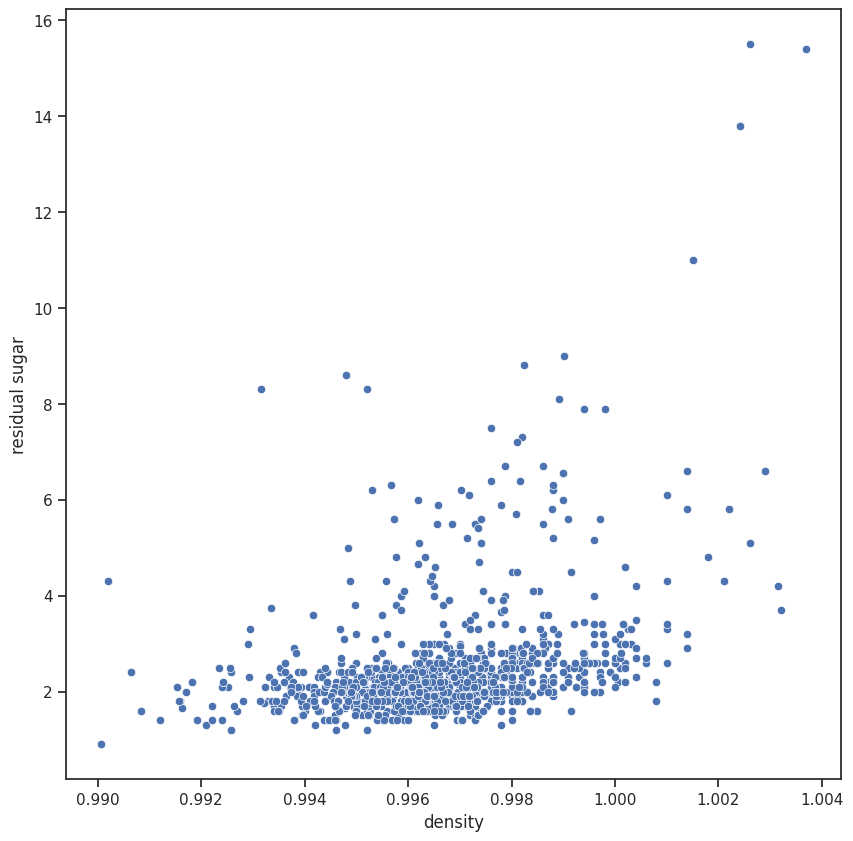

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='density', y='residual sugar', data=data)

<ipython-input-19-b90292f7fd9f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['fixed acidity'])


<Axes: xlabel='fixed acidity', ylabel='Density'>

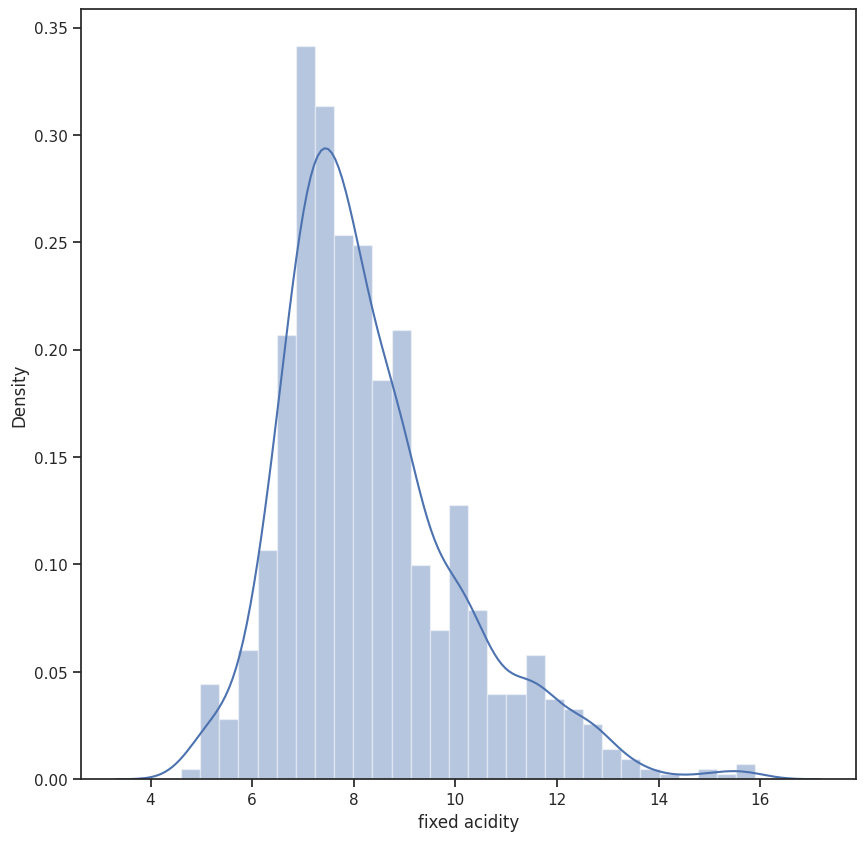

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(data['fixed acidity'])

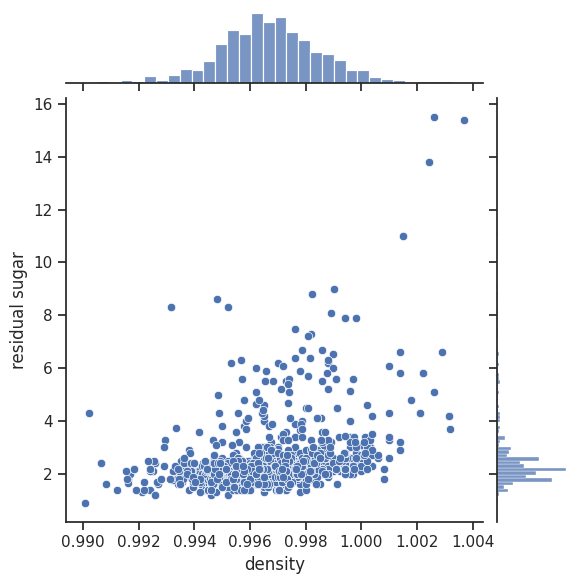

In [ ]:
sns.jointplot(x='density', y='residual sugar', data=data)


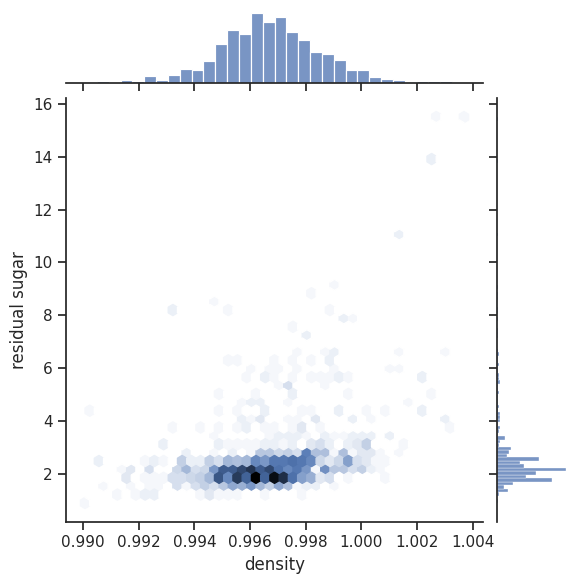

In [ ]:
sns.jointplot(x='density', y='residual sugar', data=data, kind="hex")


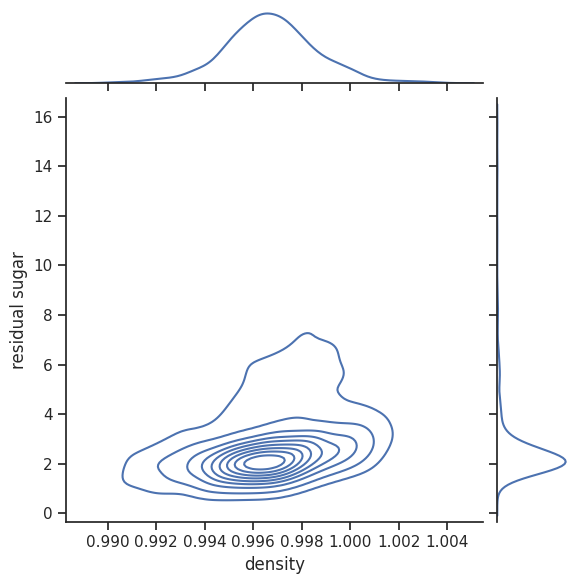

In [ ]:
sns.jointplot(x='density', y='residual sugar', data=data, kind="kde")


Парные диаграммы

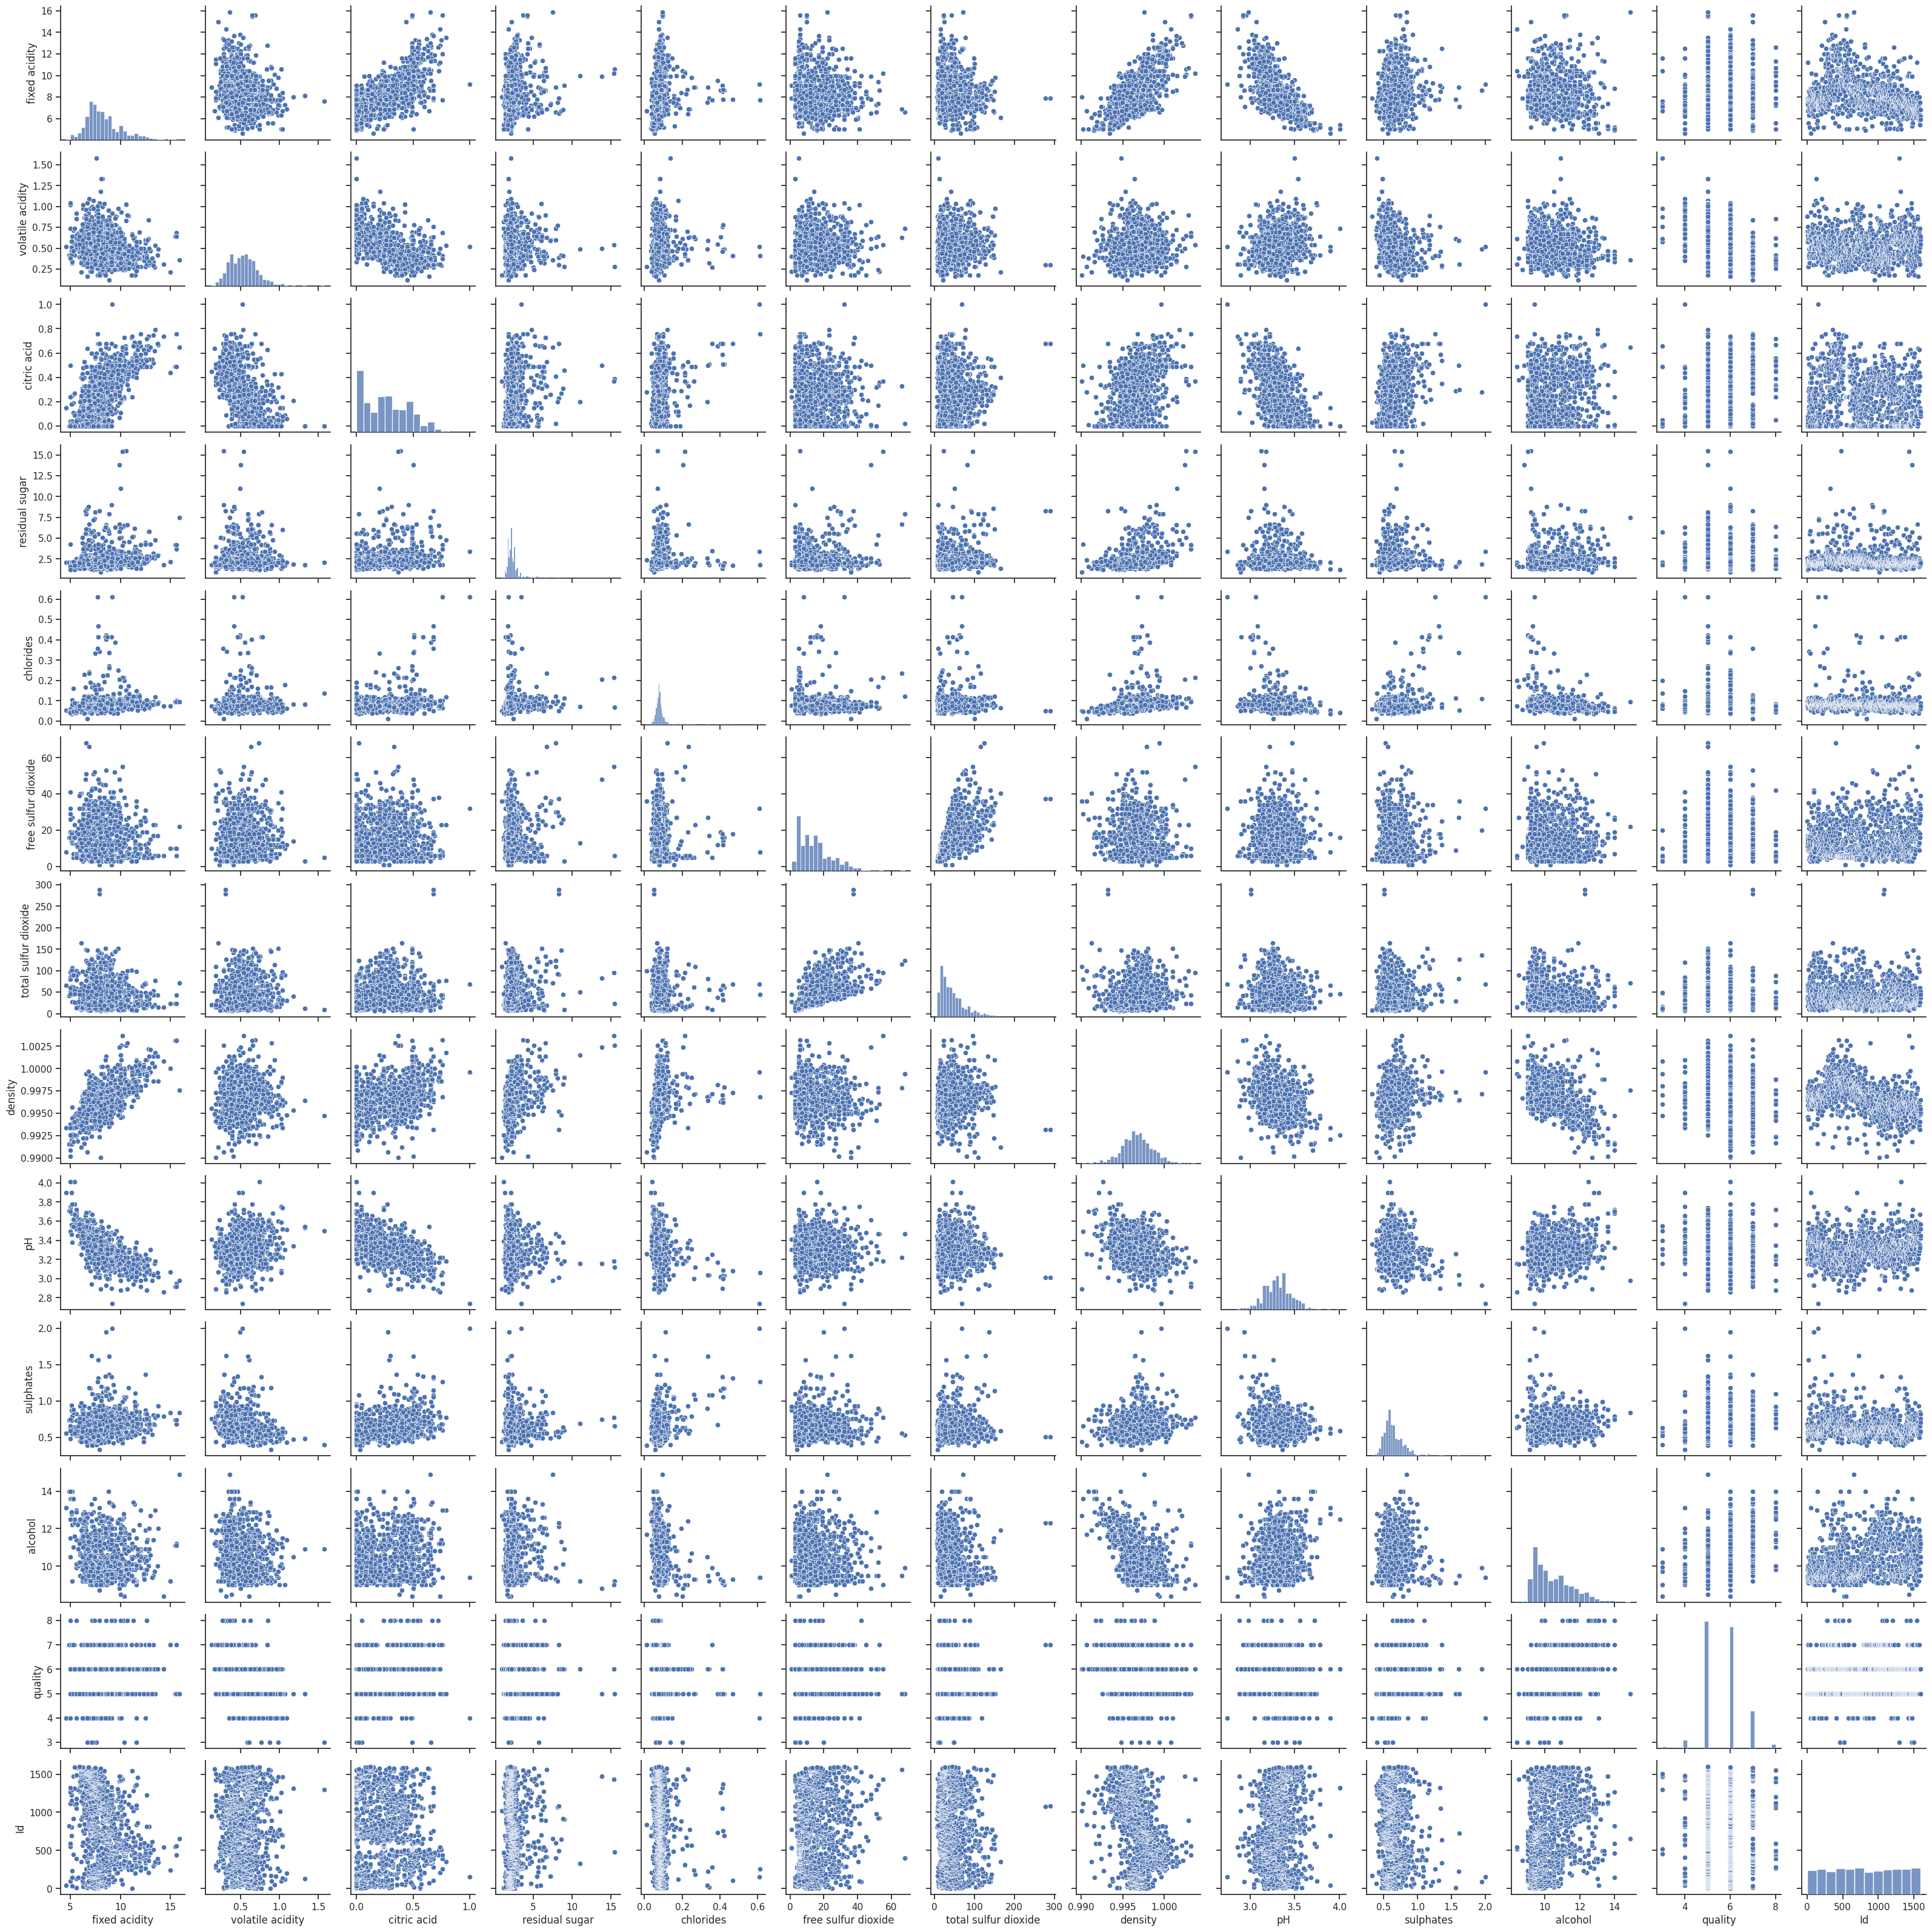

In [ ]:
sns.pairplot(data)


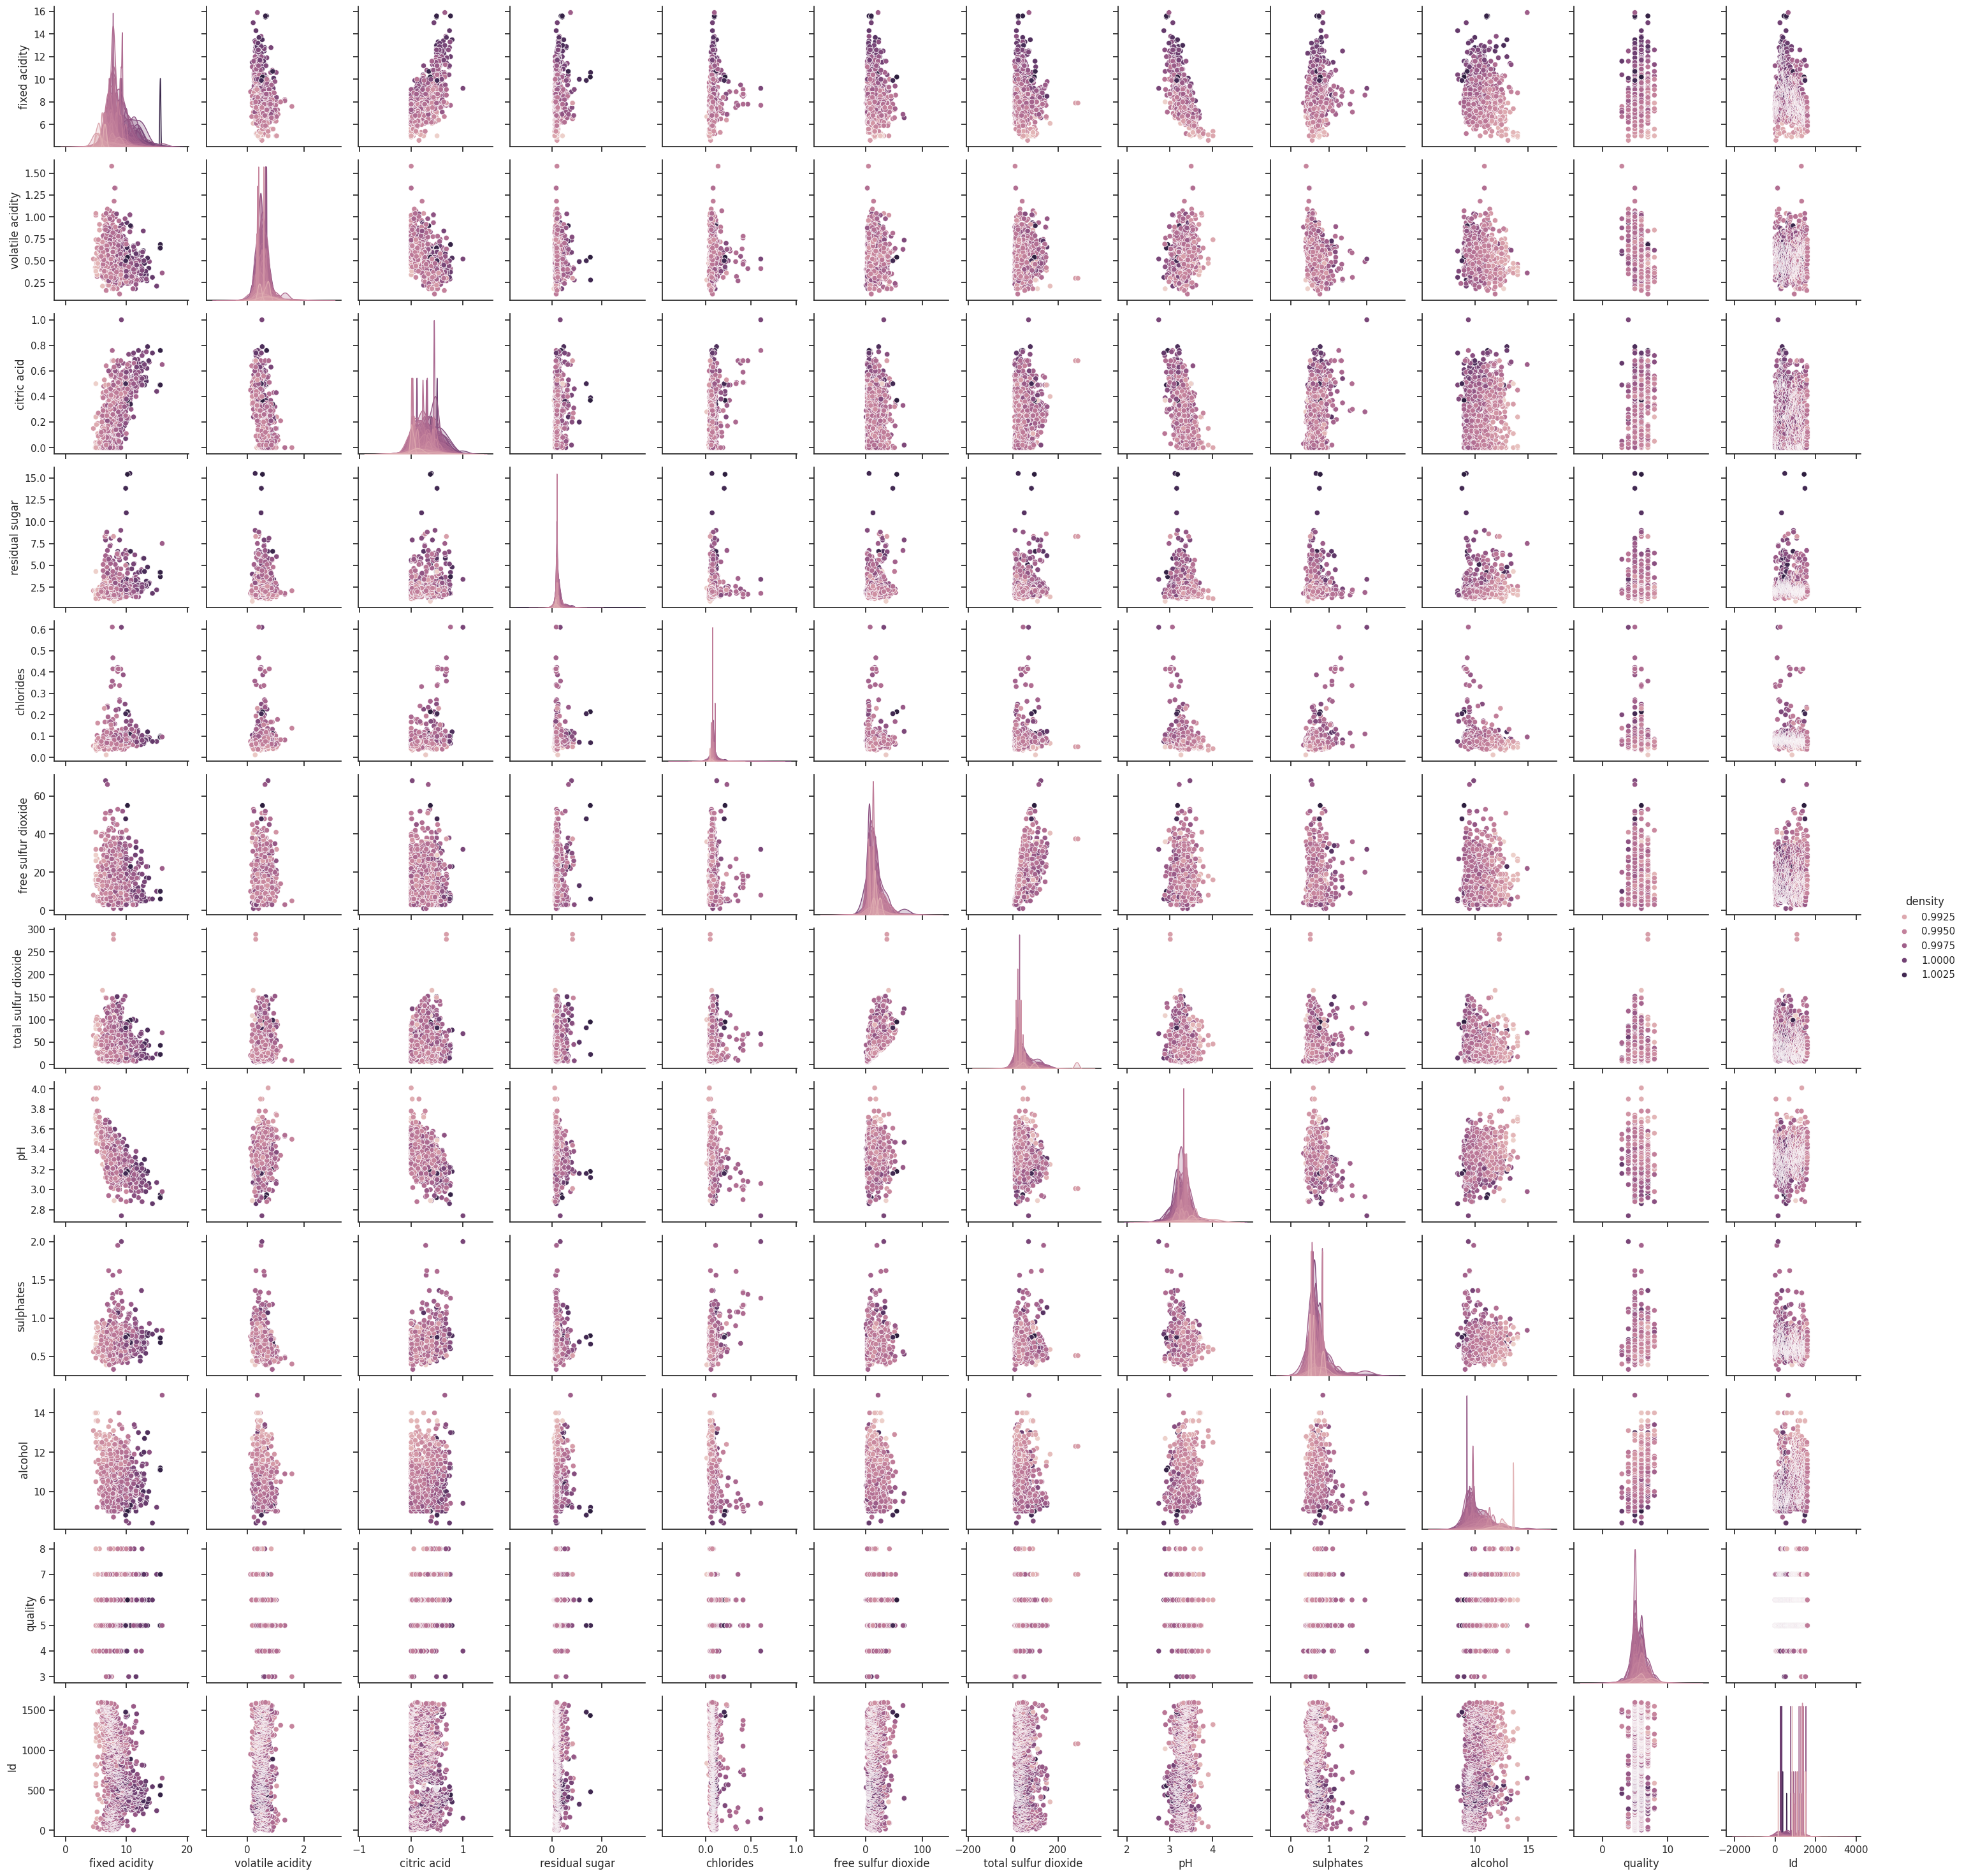

In [ ]:
sns.pairplot(data, hue="density")


Ящик с усами

<Axes: xlabel='density'>

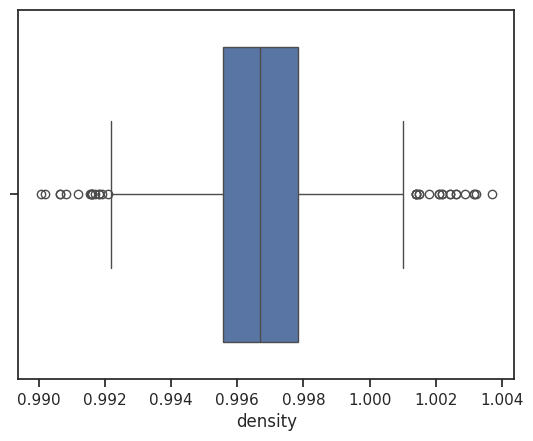

In [ ]:
sns.boxplot(x=data['density'])


<Axes: ylabel='density'>

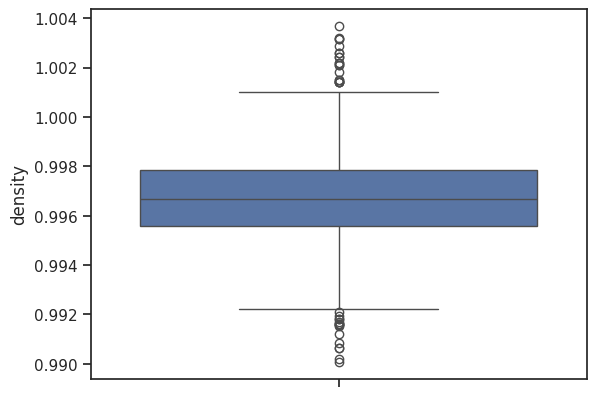

In [ ]:
sns.boxplot(y=data['density'])


<Axes: xlabel='alcohol'>

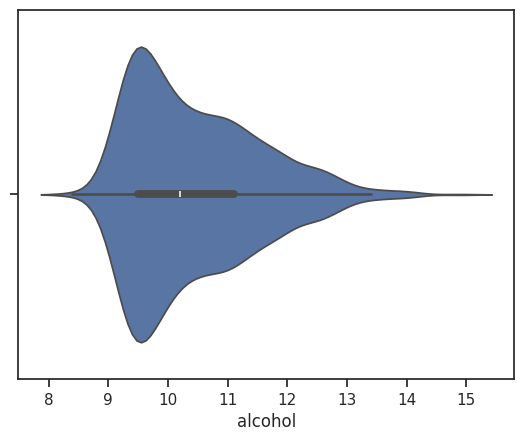

In [ ]:
sns.violinplot(x=data['alcohol'])


<ipython-input-31-dd5ad21b3582>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['alcohol'], ax=ax[1])


<Axes: xlabel='alcohol', ylabel='Density'>

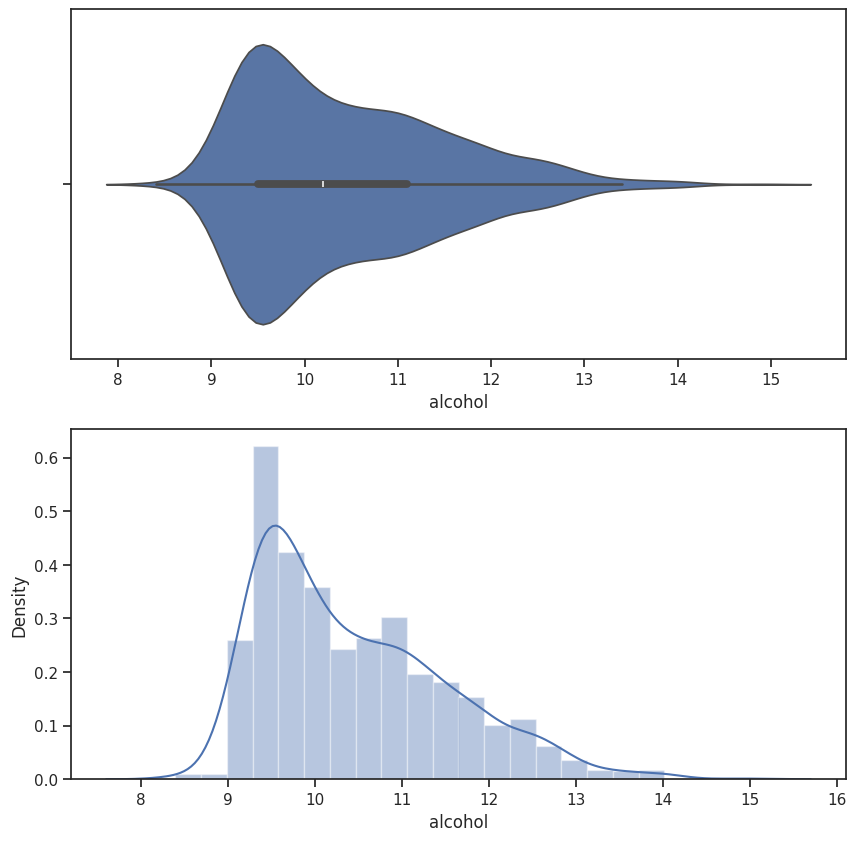

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['alcohol'])
sns.distplot(data['alcohol'], ax=ax[1])

Корреляция признаков

In [ ]:
data.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.250728     0.673157   
volatile acidity          -0.250728          1.000000    -0.544187   
citric acid                0.673157         -0.544187     1.000000   
residual sugar             0.171831         -0.005751     0.175815   
chlorides                  0.107889          0.056336     0.245312   
free sulfur dioxide       -0.164831         -0.001962    -0.057589   
total sulfur dioxide      -0.110628          0.077748     0.036871   
density                    0.681501          0.016512     0.375243   
pH                        -0.685163          0.221492    -0.546339   
sulphates                  0.174592         -0.276079     0.331232   
alcohol                   -0.075055         -0.203909     0.106250   
quality                    0.121970         -0.407394     0.240821   
Id                        -0.275826         -0.007892    -0.139011   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.171831   0.107889            -0.164831   
volatile acidity           -0.005751   0.056336            -0.001962   
citric acid                 0.175815   0.245312            -0.057589   
residual sugar              1.000000   0.070863             0.165339   
chlorides                   0.070863   1.000000             0.015280   
free sulfur dioxide         0.165339   0.015280             1.000000   
total sulfur dioxide        0.190790   0.048163             0.661093   
density                     0.380147   0.208901            -0.054150   
pH                         -0.116959  -0.277759             0.072804   
sulphates                   0.017475   0.374784             0.034445   
alcohol                     0.058421  -0.229917            -0.047095   
quality                     0.022002  -0.124085            -0.063260   
Id                         -0.046344  -0.088099             0.095268   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.110628  0.681501 -0.685163   0.174592   
volatile acidity                  0.077748  0.016512  0.221492  -0.276079   
citric acid                       0.036871  0.375243 -0.546339   0.331232   
residual sugar                    0.190790  0.380147 -0.116959   0.017475   
chlorides                         0.048163  0.208901 -0.277759   0.374784   
free sulfur dioxide               0.661093 -0.054150  0.072804   0.034445   
total sulfur dioxide              1.000000  0.050175 -0.059126   0.026894   
density                           0.050175  1.000000 -0.352775   0.143139   
pH                               -0.059126 -0.352775  1.000000  -0.185499   
sulphates                         0.026894  0.143139 -0.185499   1.000000   
alcohol                          -0.188165 -0.494727  0.225322   0.094421   
quality                          -0.183339 -0.175208 -0.052453   0.257710   
Id                               -0.107389 -0.363926  0.132904  -0.103954   

                       alcohol   quality        Id  
fixed acidity        -0.075055  0.121970 -0.275826  
volatile acidity     -0.203909 -0.407394 -0.007892  
citric acid           0.106250  0.240821 -0.139011  
residual sugar        0.058421  0.022002 -0.046344  
chlorides            -0.229917 -0.124085 -0.088099  
free sulfur dioxide  -0.047095 -0.063260  0.095268  
total sulfur dioxide -0.188165 -0.183339 -0.107389  
density              -0.494727 -0.175208 -0.363926  
pH                    0.225322 -0.052453  0.132904  
sulphates             0.094421  0.257710 -0.103954  
alcohol               1.000000  0.484866  0.238087  
quality               0.484866  1.000000  0.069708  
Id                    0.238087  0.069708  1.000000

In [ ]:
data.corr(method='pearson')


fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.250728     0.673157   
volatile acidity          -0.250728          1.000000    -0.544187   
citric acid                0.673157         -0.544187     1.000000   
residual sugar             0.171831         -0.005751     0.175815   
chlorides                  0.107889          0.056336     0.245312   
free sulfur dioxide       -0.164831         -0.001962    -0.057589   
total sulfur dioxide      -0.110628          0.077748     0.036871   
density                    0.681501          0.016512     0.375243   
pH                        -0.685163          0.221492    -0.546339   
sulphates                  0.174592         -0.276079     0.331232   
alcohol                   -0.075055         -0.203909     0.106250   
quality                    0.121970         -0.407394     0.240821   
Id                        -0.275826         -0.007892    -0.139011   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.171831   0.107889            -0.164831   
volatile acidity           -0.005751   0.056336            -0.001962   
citric acid                 0.175815   0.245312            -0.057589   
residual sugar              1.000000   0.070863             0.165339   
chlorides                   0.070863   1.000000             0.015280   
free sulfur dioxide         0.165339   0.015280             1.000000   
total sulfur dioxide        0.190790   0.048163             0.661093   
density                     0.380147   0.208901            -0.054150   
pH                         -0.116959  -0.277759             0.072804   
sulphates                   0.017475   0.374784             0.034445   
alcohol                     0.058421  -0.229917            -0.047095   
quality                     0.022002  -0.124085            -0.063260   
Id                         -0.046344  -0.088099             0.095268   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.110628  0.681501 -0.685163   0.174592   
volatile acidity                  0.077748  0.016512  0.221492  -0.276079   
citric acid                       0.036871  0.375243 -0.546339   0.331232   
residual sugar                    0.190790  0.380147 -0.116959   0.017475   
chlorides                         0.048163  0.208901 -0.277759   0.374784   
free sulfur dioxide               0.661093 -0.054150  0.072804   0.034445   
total sulfur dioxide              1.000000  0.050175 -0.059126   0.026894   
density                           0.050175  1.000000 -0.352775   0.143139   
pH                               -0.059126 -0.352775  1.000000  -0.185499   
sulphates                         0.026894  0.143139 -0.185499   1.000000   
alcohol                          -0.188165 -0.494727  0.225322   0.094421   
quality                          -0.183339 -0.175208 -0.052453   0.257710   
Id                               -0.107389 -0.363926  0.132904  -0.103954   

                       alcohol   quality        Id  
fixed acidity        -0.075055  0.121970 -0.275826  
volatile acidity     -0.203909 -0.407394 -0.007892  
citric acid           0.106250  0.240821 -0.139011  
residual sugar        0.058421  0.022002 -0.046344  
chlorides            -0.229917 -0.124085 -0.088099  
free sulfur dioxide  -0.047095 -0.063260  0.095268  
total sulfur dioxide -0.188165 -0.183339 -0.107389  
density              -0.494727 -0.175208 -0.363926  
pH                    0.225322 -0.052453  0.132904  
sulphates             0.094421  0.257710 -0.103954  
alcohol               1.000000  0.484866  0.238087  
quality               0.484866  1.000000  0.069708  
Id                    0.238087  0.069708  1.000000

In [ ]:
data.corr(method='kendall')


fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.182211     0.477402   
volatile acidity          -0.182211          1.000000    -0.422817   
citric acid                0.477402         -0.422817     1.000000   
residual sugar             0.169650          0.008939     0.147314   
chlorides                  0.190340          0.105166     0.097419   
free sulfur dioxide       -0.128891          0.012389    -0.048959   
total sulfur dioxide      -0.060461          0.069850     0.010459   
density                    0.463205          0.011593     0.248567   
pH                        -0.528978          0.151686    -0.386216   
sulphates                  0.128537         -0.241919     0.234706   
alcohol                   -0.062136         -0.150112     0.060093   
quality                    0.079804         -0.314566     0.174361   
Id                        -0.203230         -0.000741    -0.088827   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.169650   0.190340            -0.128891   
volatile acidity            0.008939   0.105166             0.012389   
citric acid                 0.147314   0.097419            -0.048959   
residual sugar              1.000000   0.144407             0.036078   
chlorides                   0.144407   1.000000             0.001913   
free sulfur dioxide         0.036078   0.001913             1.000000   
total sulfur dioxide        0.087239   0.089462             0.610175   
density                     0.297810   0.298309            -0.049295   
pH                         -0.076698  -0.172479             0.078790   
sulphates                   0.022005   0.000857             0.019283   
alcohol                     0.086043  -0.214756            -0.043917   
quality                     0.024646  -0.151690            -0.047784   
Id                         -0.080393  -0.125844             0.056137   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.060461  0.463205 -0.528978   0.128537   
volatile acidity                  0.069850  0.011593  0.151686  -0.241919   
citric acid                       0.010459  0.248567 -0.386216   0.234706   
residual sugar                    0.087239  0.297810 -0.076698   0.022005   
chlorides                         0.089462  0.298309 -0.172479   0.000857   
free sulfur dioxide               0.610175 -0.049295  0.078790   0.019283   
total sulfur dioxide              1.000000  0.074175 -0.000733  -0.008000   
density                           0.074175  1.000000 -0.220994   0.104783   
pH                               -0.000733 -0.220994  1.000000  -0.041656   
sulphates                        -0.008000  0.104783 -0.041656   1.000000   
alcohol                          -0.168165 -0.337694  0.135893   0.137580   
quality                          -0.154570 -0.136659 -0.026210   0.313794   
Id                               -0.074237 -0.265806  0.096839  -0.038981   

                       alcohol   quality        Id  
fixed acidity        -0.062136  0.079804 -0.203230  
volatile acidity     -0.150112 -0.314566 -0.000741  
citric acid           0.060093  0.174361 -0.088827  
residual sugar        0.086043  0.024646 -0.080393  
chlorides            -0.214756 -0.151690 -0.125844  
free sulfur dioxide  -0.043917 -0.047784  0.056137  
total sulfur dioxide -0.168165 -0.154570 -0.074237  
density              -0.337694 -0.136659 -0.265806  
pH                    0.135893 -0.026210  0.096839  
sulphates             0.137580  0.313794 -0.038981  
alcohol               1.000000  0.396085  0.186433  
quality               0.396085  1.000000  0.063574  
Id                    0.186433  0.063574  1.000000

In [ ]:
data.corr(method='spearman')


fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.271597     0.653749   
volatile acidity          -0.271597          1.000000    -0.601305   
citric acid                0.653749         -0.601305     1.000000   
residual sugar             0.242521          0.012988     0.210283   
chlorides                  0.272554          0.153031     0.142182   
free sulfur dioxide       -0.190341          0.021178    -0.075070   
total sulfur dioxide      -0.093900          0.101862     0.007291   
density                    0.629644          0.019111     0.354884   
pH                        -0.707010          0.222106    -0.544998   
sulphates                  0.194222         -0.343500     0.340666   
alcohol                   -0.085751         -0.223379     0.090691   
quality                    0.103887         -0.397784     0.222882   
Id                        -0.289223         -0.000877    -0.125007   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.242521   0.272554            -0.190341   
volatile acidity            0.012988   0.153031             0.021178   
citric acid                 0.210283   0.142182            -0.075070   
residual sugar              1.000000   0.201531             0.051230   
chlorides                   0.201531   1.000000             0.002484   
free sulfur dioxide         0.051230   0.002484             1.000000   
total sulfur dioxide        0.124370   0.126247             0.793745   
density                     0.422578   0.426509            -0.071330   
pH                         -0.108683  -0.249068             0.113952   
sulphates                   0.030979   0.001763             0.028295   
alcohol                     0.123493  -0.309720            -0.064219   
quality                     0.030614  -0.193814            -0.059213   
Id                         -0.115354  -0.187850             0.086885   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.093900  0.629644 -0.707010   0.194222   
volatile acidity                  0.101862  0.019111  0.222106  -0.343500   
citric acid                       0.007291  0.354884 -0.544998   0.340666   
residual sugar                    0.124370  0.422578 -0.108683   0.030979   
chlorides                         0.126247  0.426509 -0.249068   0.001763   
free sulfur dioxide               0.793745 -0.071330  0.113952   0.028295   
total sulfur dioxide              1.000000  0.109786 -0.001788  -0.010544   
density                           0.109786  1.000000 -0.316985   0.154057   
pH                               -0.001788 -0.316985  1.000000  -0.063352   
sulphates                        -0.010544  0.154057 -0.063352   1.000000   
alcohol                          -0.243461 -0.471354  0.195499   0.198741   
quality                          -0.194570 -0.176505 -0.033205   0.393681   
Id                               -0.109298 -0.403163  0.142798  -0.055172   

                       alcohol   quality        Id  
fixed acidity        -0.085751  0.103887 -0.289223  
volatile acidity     -0.223379 -0.397784 -0.000877  
citric acid           0.090691  0.222882 -0.125007  
residual sugar        0.123493  0.030614 -0.115354  
chlorides            -0.309720 -0.193814 -0.187850  
free sulfur dioxide  -0.064219 -0.059213  0.086885  
total sulfur dioxide -0.243461 -0.194570 -0.109298  
density              -0.471354 -0.176505 -0.403163  
pH                    0.195499 -0.033205  0.142798  
sulphates             0.198741  0.393681 -0.055172  
alcohol               1.000000  0.495439  0.276662  
quality               0.495439  1.000000  0.084472  
Id                    0.276662  0.084472  1.000000

<Axes: >

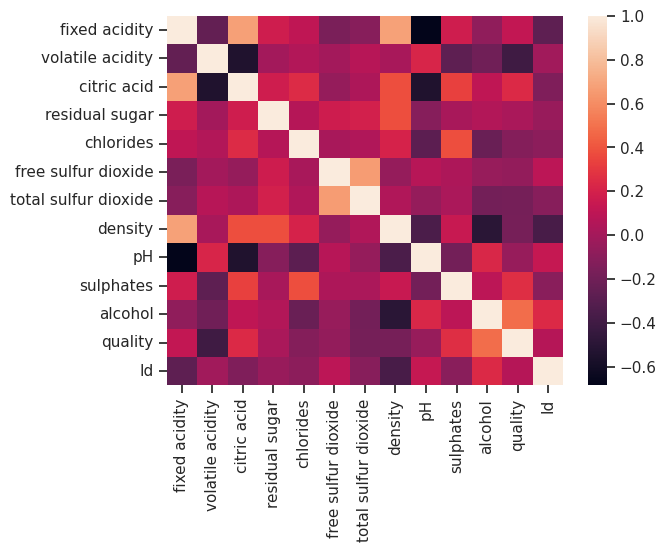

In [ ]:
sns.heatmap(data.corr())


<Axes: >

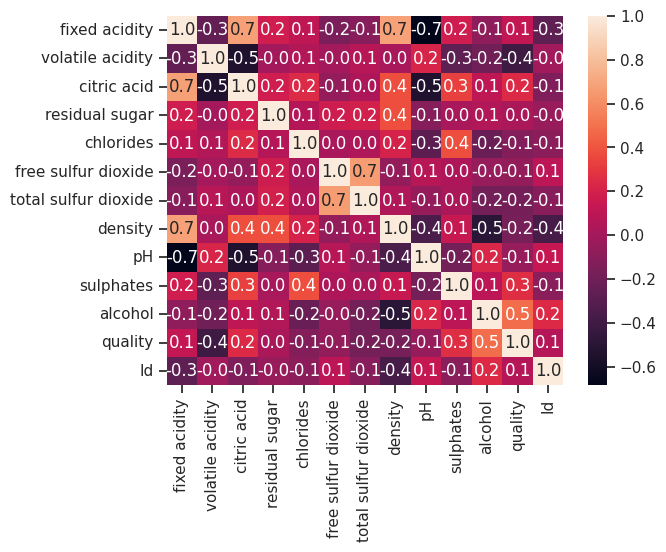

In [ ]:
sns.heatmap(data.corr(), annot=True, fmt='.1f')


<Axes: >

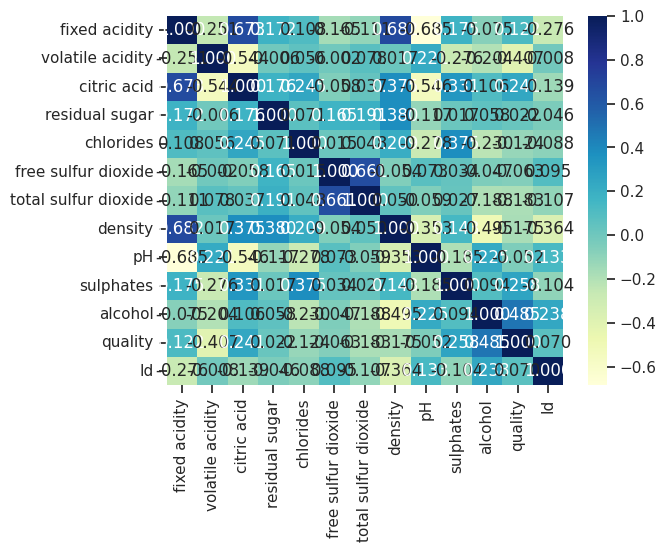

In [ ]:
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')


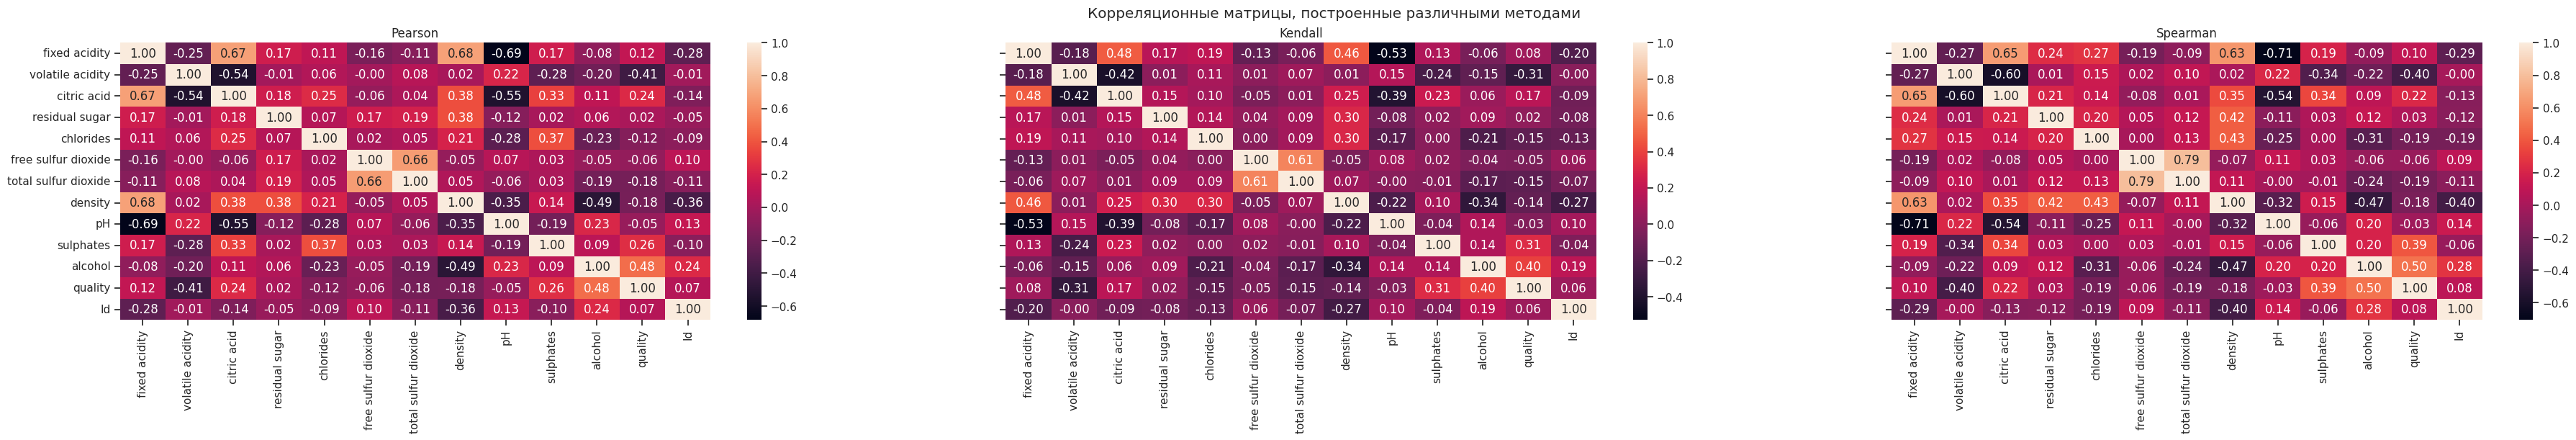

In [ ]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(45,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

<Axes: >

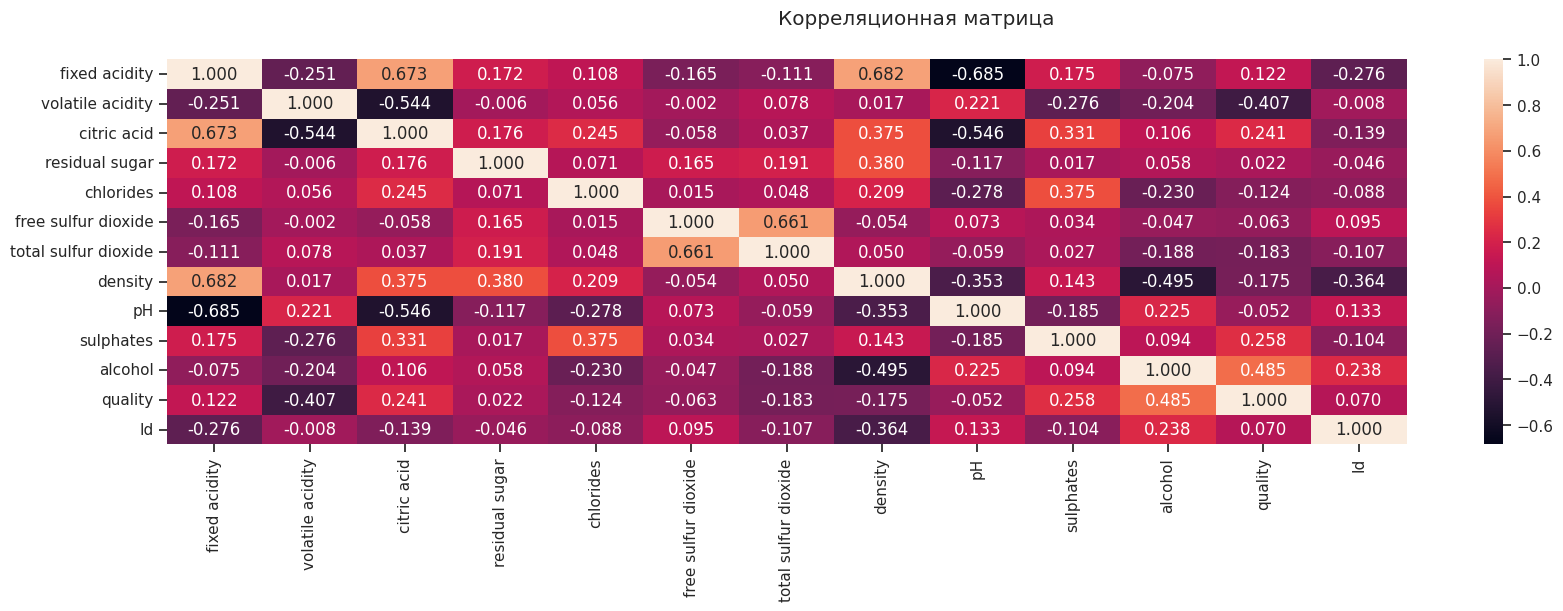

In [ ]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(20,5))
fig.suptitle('Корреляционная матрица')
sns.heatmap(data.corr(), ax=ax, annot=True, fmt='.3f')